In [1]:
import sys
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

# plt.style.use('whitegrid')
sns.set_style('whitegrid')

matplotlib.rcParams.update({'figure.figsize': (10, 6)})
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'axes.labelsize': 20})
matplotlib.rcParams.update({'xtick.labelsize': 12})
matplotlib.rcParams.update({'ytick.labelsize': 12})
matplotlib.rcParams.update({'font.family': 'Helvetica, Arial, sans-serif'})

%config InlineBackend.figure_format = 'retina'

In [32]:
data = pd.read_csv('data/creditcard.csv')
featured_data = data.drop(['Time','Amount'], axis=1)

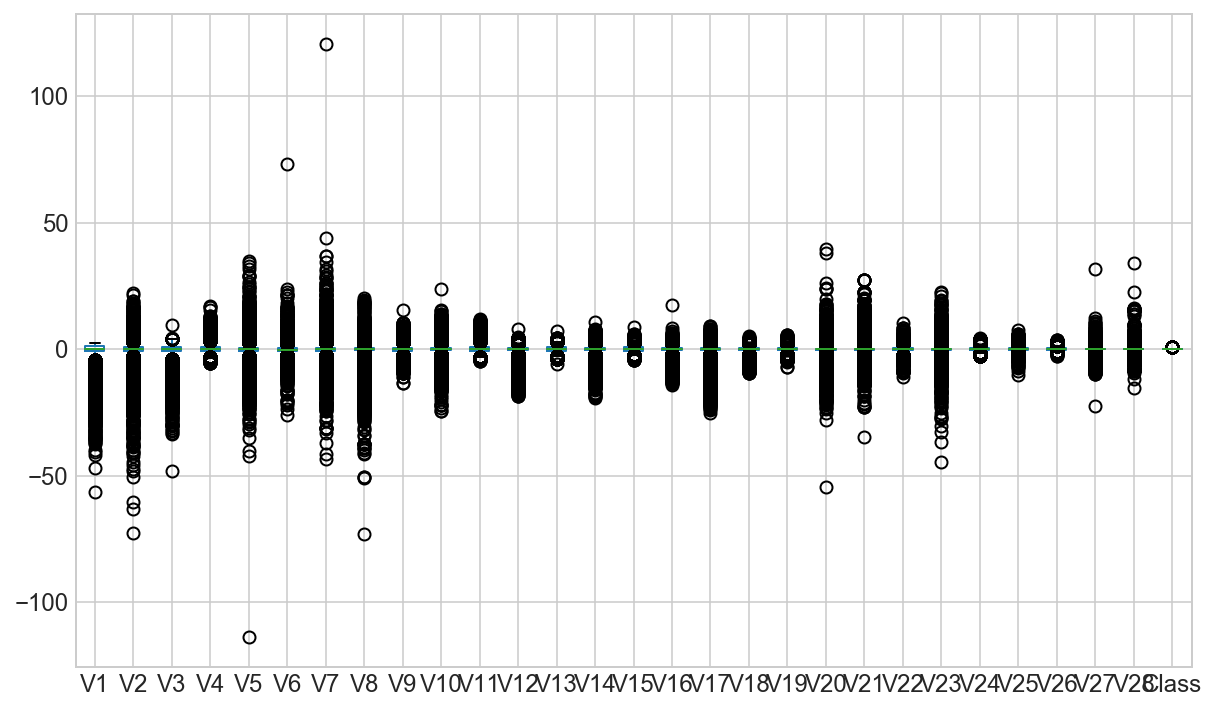

In [35]:
featured_data.plot(kind='box')
plt.show()

In [40]:
# Linear dimensionality reduction: Linear PCA
from sklearn.decomposition import PCA

# [CITE] "04. Dimension Reduction and Images Notebook" by Eric Larson
# i.e. the number of dimensions
test_components_count = 29

def linear_pca(n_components, matrix):
    pca = PCA(n_components=n_components)
    %time pca.fit(matrix)
    return pca


# [CITE] "04. Dimension Reduction and Images Notebook" by Eric Larson

def pca_comp_range(p):
    return np.arange(0,p.n_components)

def explained_var(p):
    return p.explained_variance_ratio_

def cumulative_explained_var(p):
    return np.cumsum(explained_var(p))

def find_nearest_x_for_y(x,y,value):
    index = np.abs(y-value).argmin()
    return x[index]

def find_90_percent_dimension_count(p):
    return find_nearest_x_for_y(pca_comp_range(p), cumulative_explained_var(p),0.9)

def plot_explained_variance(pca):    
    fig, g = plt.subplots()
    cr = pca_comp_range(pca)
    expvar = explained_var(pca)
    cumexpvar = cumulative_explained_var(pca)
    
    g.fill_between(cr, 0, expvar, color='blue', 
        label='individual explained variance')
    g.plot(cr, cumexpvar, color='orange', linestyle='-', marker='', 
        label='cumulative explained variance')
    g.axhline(y=0.9,color='gray',linestyle='--', 
        label='90% accuracy target')
    
    g.set(xlabel='Principal components',ylabel='Explained variance ratio',
        xlim=(0,pca.n_components),ylim=(0,1),
        title='Explained variance of components')
    g.legend(loc='lower right')
    plt.show()

In [41]:
data_matrix = np.asarray(featured_data)

test_pca = linear_pca(test_components_count, data_matrix)

CPU times: user 554 ms, sys: 71.7 ms, total: 626 ms
Wall time: 392 ms


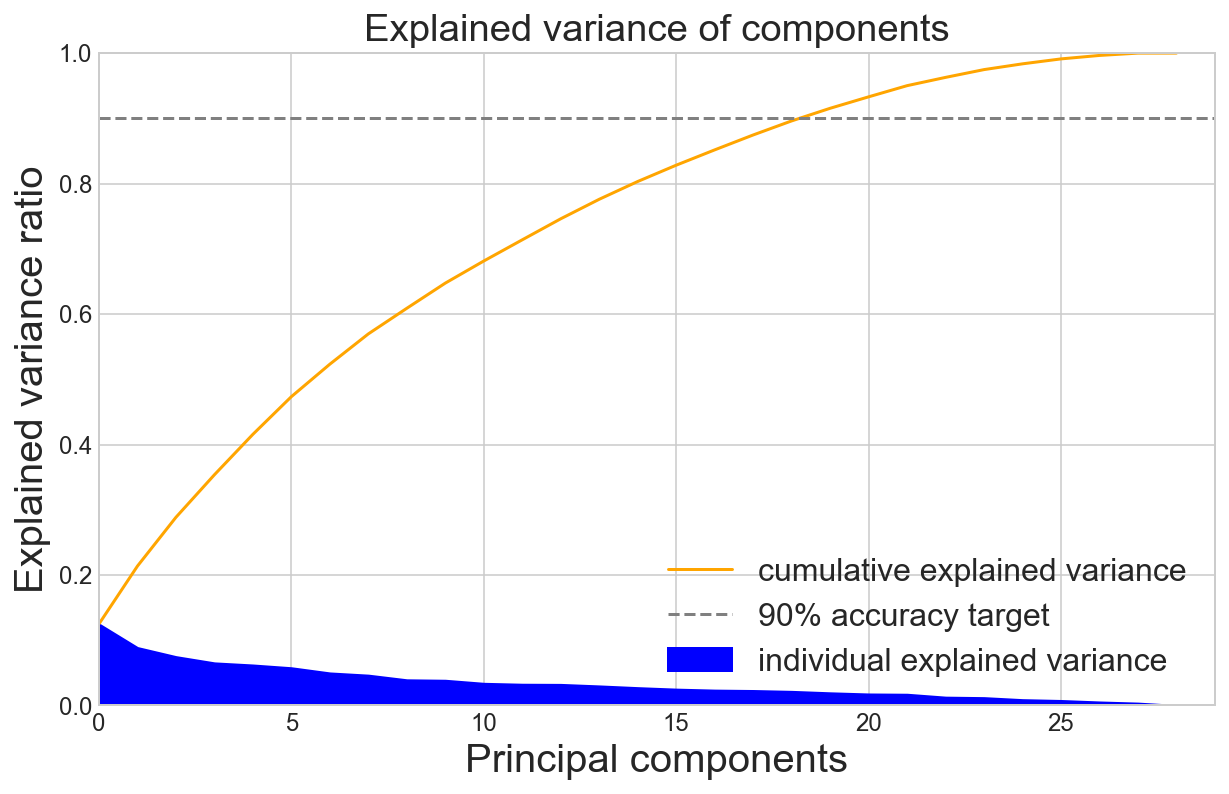

In [42]:
plot_explained_variance(test_pca)

In [24]:
print(test_pca.explained_variance_)

[  6.25618850e+04   3.74538903e+00   2.43623931e+00   2.20494787e+00
   1.99913808e+00   1.81121888e+00   1.66490210e+00   1.43161119e+00
   1.21193090e+00   1.19661817e+00   1.04189666e+00   9.98757130e-01
   9.90645937e-01   9.24088235e-01   8.38749222e-01   8.35052915e-01
   7.67833823e-01   7.21474811e-01   7.01021091e-01   6.60478498e-01
   5.44264429e-01   5.28042471e-01   4.02950988e-01   3.66827879e-01
   2.75175015e-01   2.32560970e-01   1.65682418e-01   1.13310769e-01
   1.06016220e-01   8.24215532e-04]
